<hr style="border:5px solid cyan"> </hr>

## <span style='background:rgba(0,255,255, 0.5); color:black'>Activity: Classes of Fourier approximations</span><a id='activity-polynomials'></a>

Given a function $f(x)$ that is defined on the interval $[-1,1]$, it is usually possible to write $f(x)$ approximately as a sum of functions that look like waves - sine and cosine: $$f(x)\approx \dfrac{a_0}{2}+\sum_{i=1}^{n}\left( a_i\cos \left( \dfrac{i\pi x}{2}\right)+b_i\sin \left( \dfrac{i\pi x}{2}\right)\right)$$ where the $a_i$ and $b_i$ are the coefficients of cosine and sine respectively. $n$ is referring to the number of terms used; the approximation gets better and better as $n$ gets larger. This type of approximation of a function is referred to as a Fourier approximation. See https://en.wikipedia.org/wiki/Fourier_analysis for some history of this idea. As an example, consider the function $f(x)=x$. Let's we want to use up to 3 terms of cosines and sines to approximate $f$. It turns out that all the $a_i$'s are 0 and $b_0=0$, $b_1=0.40528473$, $b_2=0.31830989$, and $b_3=-0.04503164$ so that $$f(x)\approx 0.40528473\sin \left( \dfrac{\pi x}{2}\right)+0.31830989\sin \left( \dfrac{2\pi x}{2}\right)-0.04503164\sin \left( \dfrac{3\pi x}{2}\right).$$ A graph of $f(x)$ and the approximation is created in the cell block below.

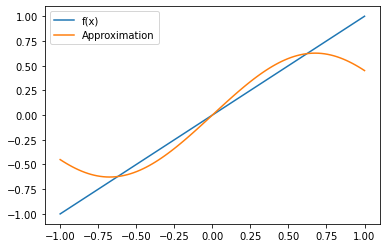

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x): # defining f(x)
    return(x)

def approx(x): # defining the approximation of f(x) using cosine's and sine's
    return(0.40528473*np.sin(np.pi*x/2)+0.31830989*np.sin(2*np.pi*x/2)-0.04503164*np.sin(3*np.pi*x/2))

x = np.linspace(-1,1,100) # 100 values between -1 and 1 to use for plotting
plt.figure()
plt.plot(x, f(x), label='f(x)')
plt.plot(x, approx(x), label='Approximation')
plt.legend()
plt.show()

Our goal in this activity is to create a class called `FourierApprox` that will take a function `func` and integer `n` and create the coefficients `as` and `bs` of the Fourier approximation using `n` terms as well as evaluate and plot the approximation. The below code cell contains the beginnings of such a class.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.integrate as integrate

class FourierApprox(object):
    
    '''
    This class creates a Fourier approximation of a given function and provides methods to evaluate 
    and plot the Fourier approximation. 
    
    Variables 
    ---------
    func: function to be approximation. Function needs to be defined on the interval [-1,1].
    n: number of terms to be kept from the Fourier series. 
    
    Attributes
    ----------
    as: array with shape n+1 that contains the coefficients a_k from k=0 to k=n. 
    bs: array with shape n+1 that contains the coefficients b_k from k=0 to k=n. 
    
    Methods
    -------
    fourier_approx_eval(x): evaluates the Fourier approximation of func at x.
    plot(): plots the Fourier approximation along with func.
    '''
    
    def __init__(self, func, n):
        
        self.func = func
        self.n = n
        
        # creating coefficients of Fourier approximation as a attributes as and bs
        coefficients = np.zeros(shape=(2,self.n+1))
        coefficients[0,0] = integrate.quad(func, -1, 1)[0]/2
        def integrand_as(x,m):
            return(self.func(x)*np.cos(m*np.pi*x/2)/2)
        def integrand_bs(x,m):
            return(self.func(x)*np.sin(m*np.pi*x/2)/2)
        for i in range(self.n):
            coefficients[0,i+1] = integrate.quad(integrand_as, -1, 1, args=i+1)[0]
            coefficients[1,i+1] = integrate.quad(integrand_bs, -1, 1, args=i+1)[0]
            
        self.as = coefficients[0,:]
        self.bs = coefficients[1,:]
            
    def fourier_approx_eval(self, x):
        
        '''
        Method for evaluating the Fourier approximation at x. 
        '''
        
        fourier_approx_value = self.as[0]/2
        for i in range(self.n):
            fourier_approx_value += self.as[i+1]*np.cos((i+1)*np.pi*x/2) + self.bs[i+1]*np.sin((i+1)*np.pi*x/2)
        return(fourier_approx_value)
    
    def plot(self):
        
        '''
        Method for plotting the Fourier approximation and the original function.
        '''
        

- Finish coding the `plot` method in the above `FourierApprox` class so that the `plot` method will plot the original function `func` and the Fourier approximation `fourier_approx_eval` on the same plot from -1.0 to 1.0. 
- Edit the class so that `n` has a default value of 10.
- Create your own function in the cell below to test the code.
- Use the `plot` method to graph your function along with its Fourier approximation with `n`=20 terms.

In [ ]:
def func(x):
    # define your own function here; make sure your function can take both `float` and `ndarray` types as inputs
    return()

In [ ]:
# use the plot method of Fourier_approx to plot your function along with its Fourier approximation using n=20 terms


<hr style="border:5px solid cyan"> </hr>